In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt


np.random.seed(42) 
data = np.random.rand(1000, 2) 

def initialize_centroids(data, k):
    indices = random.sample(range(data.shape[0]), k)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1) 
        cluster = np.argmin(distances) 
        clusters.append(cluster)
    return np.array(clusters)

def recalculate_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
        else:
            centroid = data[random.randint(0, data.shape[0] - 1)] 
        centroids.append(centroid)
    return np.array(centroids)

def k_means(data, k, max_iterations=100, eps=1e-4):
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = recalculate_centroids(data, clusters, k)
        if np.all(np.abs(new_centroids - centroids) < eps):
            print(f"iteration: {i}")
            break
        centroids = new_centroids
    
    return centroids, clusters

k = 10
centroids, clusters = k_means(data, k)

print("Центроиды кластеров:")
print(centroids)

# print(data)
# print(clusters)

iteration: 32
Центроиды кластеров:
[[0.1136166  0.16654404]
 [0.84681575 0.53697975]
 [0.8437233  0.84631111]
 [0.54642118 0.48944151]
 [0.14003236 0.86627233]
 [0.89424705 0.22710341]
 [0.18617602 0.53309452]
 [0.49715604 0.80684322]
 [0.6613042  0.14403692]
 [0.37048911 0.18004143]]


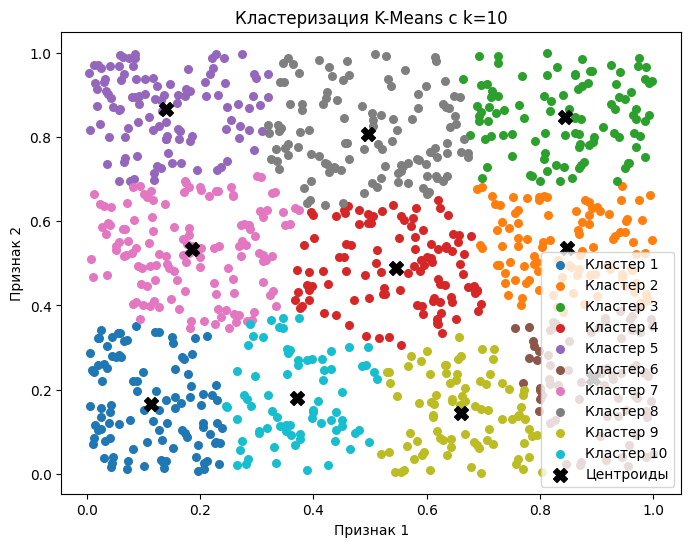

In [38]:
plt.figure(figsize=(8, 6))

for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, label=f'Кластер {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title(f'Кластеризация K-Means с k={k}')
plt.legend()
plt.show()

iteration: 1
iteration: 4
iteration: 18
iteration: 23
iteration: 15
iteration: 16
iteration: 20
iteration: 15
iteration: 29
iteration: 23


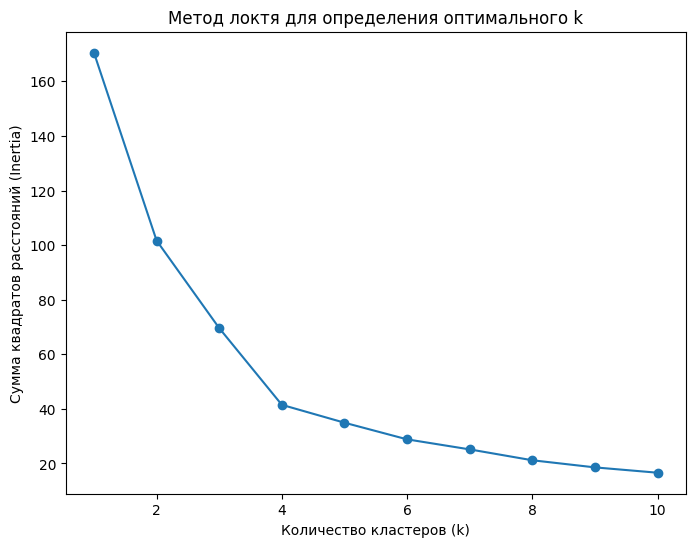

In [39]:

def calculate_inertia(data, centroids, clusters):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


def elbow_method(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        centroids, clusters = k_means(data, k)
        inertia = calculate_inertia(data, centroids, clusters)
        inertias.append(inertia)
    return inertias


max_k = 10
inertias = elbow_method(data, max_k)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Сумма квадратов расстояний (Inertia)')
plt.title('Метод локтя для определения оптимального k')
plt.show()

iteration: 13
iteration: 27
iteration: 19
iteration: 17
iteration: 19
iteration: 21
iteration: 16
iteration: 23
iteration: 33


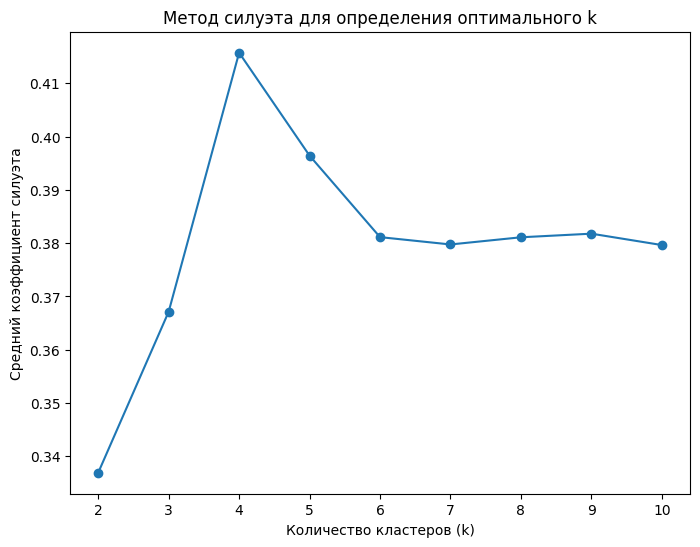

In [40]:
def silhouette_score(data, clusters, centroids):
    silhouette_scores = []
    for i, point in enumerate(data):
        cluster = clusters[i]
        intra_cluster_distances = np.linalg.norm(data[clusters == cluster] - point, axis=1)
        a = np.mean(intra_cluster_distances)
        
        inter_cluster_distances = []
        for j, centroid in enumerate(centroids):
            if j != cluster:
                inter_cluster_distances.append(np.mean(np.linalg.norm(data[clusters == j] - point, axis=1)))
        b = np.min(inter_cluster_distances)
        
        silhouette_score = (b - a) / max(a, b)
        silhouette_scores.append(silhouette_score)
    
    return np.mean(silhouette_scores)

def silhouette_method(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        centroids, clusters = k_means(data, k)
        score = silhouette_score(data, clusters, centroids)
        silhouette_scores.append(score)
    return silhouette_scores

silhouette_scores = silhouette_method(data, max_k)

plt.figure(figsize=(8, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Средний коэффициент силуэта')
plt.title('Метод силуэта для определения оптимального k')
plt.show()

In [41]:
k = int(input("Enter k: "))
centroids, clusters = k_means(data, k)

print("Центроиды кластеров:")
print(centroids)

# print(data)
# print(clusters)

iteration: 11
Центроиды кластеров:
[[0.2203606  0.74366802]
 [0.75032358 0.27535917]
 [0.22701359 0.23024932]
 [0.74597008 0.74449856]]


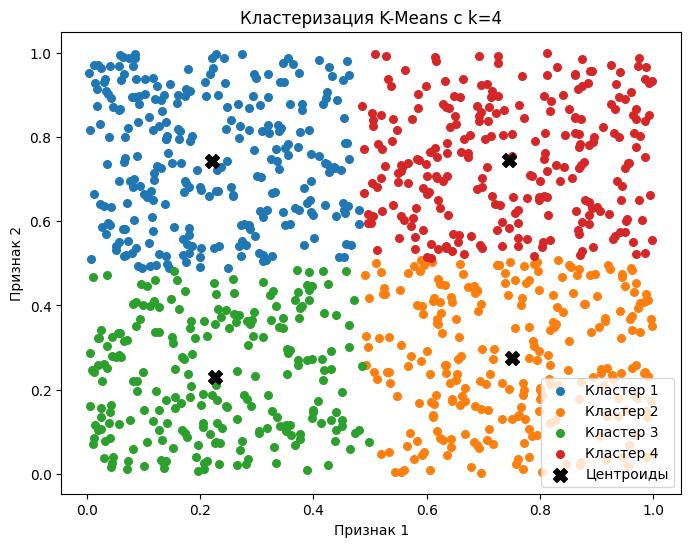

In [42]:
plt.figure(figsize=(8, 6))

for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, label=f'Кластер {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title(f'Кластеризация K-Means с k={k}')
plt.legend()
plt.show()